In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to ints...
file ready!
Wall time: 17.3 s


In [6]:
s = 'fdasadf.abc'
s[:s.rfind('.')] + '_xd' + s[s.rfind('.'):]

'fdasadf_xd.abc'

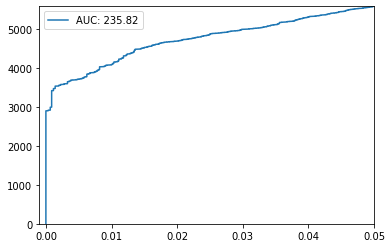

In [4]:
pseudoROC(dSlow)
plt.savefig('../results/pseudo_ROC_slow.png')

NuXL:tag_XLed


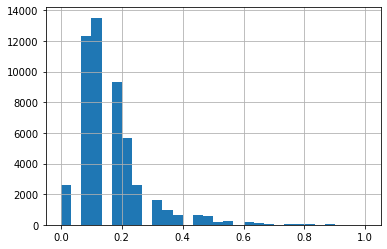

NuXL:tag_shifted


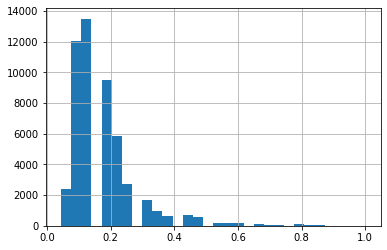

NuXL:marker_ions_score


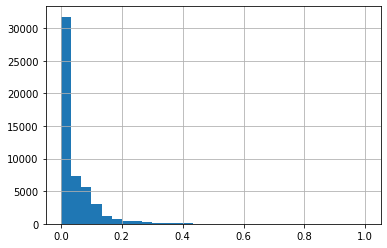

NuXL:partial_loss_score


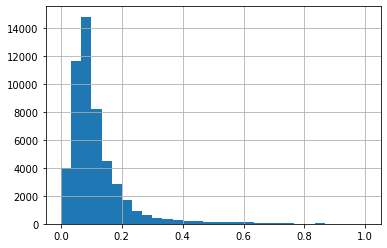

NuXL:pl_MIC


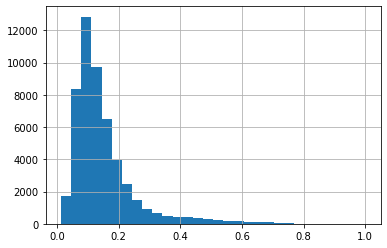

NuXL:pl_err


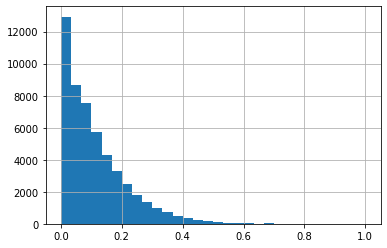

NuXL:pl_Morph


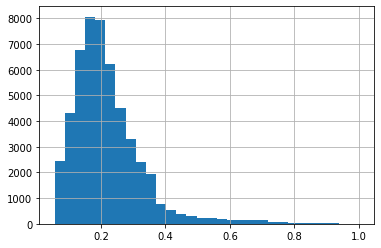

NuXL:pl_modds


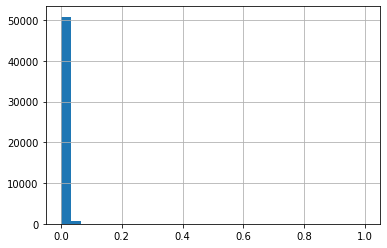

NuXL:pl_pc_MIC


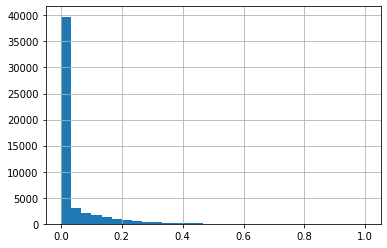

NuXL:pl_im_MIC


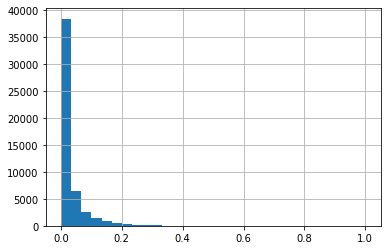

NuXL:NA_MASS_z0


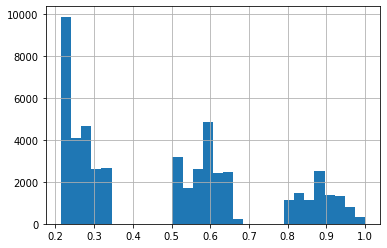

NuXL:NA_length


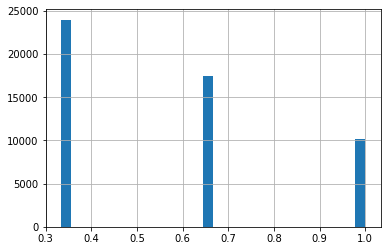

In [25]:
for l in ls:
    print(l)
    dSlow.loc[dSlow['NuXL:isXL'] == 1,l].hist(bins=30)
    plt.show()

In [22]:
ls = ['NuXL:tag_XLed', 'NuXL:tag_shifted', 'NuXL:marker_ions_score', 'NuXL:partial_loss_score', 'NuXL:pl_MIC', 'NuXL:pl_err', 'NuXL:pl_Morph', 'NuXL:pl_modds', 'NuXL:pl_pc_MIC', 'NuXL:pl_im_MIC', 'NuXL:NA_MASS_z0', 'NuXL:NA_length']

In [6]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

df = pd.DataFrame([0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0], columns = ['test'])

In [7]:
comb = [df.loc[df['test'] == b] for b in [0,1]]
genSplits = map(lambda part: np.array_split(shuffle(part), 3), comb)
[pd.concat(z) for z in zip(*genSplits)]

[    test
 0      0
 23     0
 13     0
 17     0
 27     0
 25     1
 24     1
 6      1
 29     1
 8      1
 11     1,
     test
 30     0
 4      0
 19     0
 26     0
 3      0
 20     1
 5      1
 15     1
 7      1
 22     1,
     test
 2      0
 1      0
 12     0
 21     0
 14     0
 18     1
 28     1
 9      1
 10     1
 16     1]

235.81514451131142

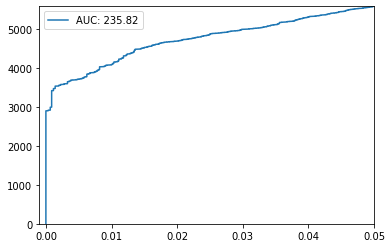

In [6]:
pseudoROC(dSlow, qColName = 'q-val')

233.82740713636466

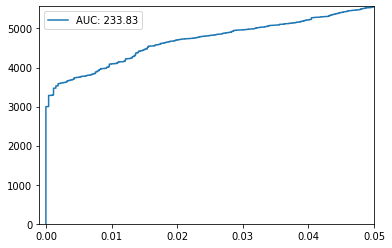

In [7]:
pseudoROC(dSlow, qColName = 'class-specific_q-val')

In [4]:
dSlow.loc[:,['q-val','class-specific_q-val']].head(20)

,q-val,class-specific_q-val
15534,0.0,0.0
15647,0.0,0.0
12279,0.0,0.0
14073,0.0,0.0
14191,0.0,0.0
77656,0.0,0.0
28032,0.0,0.0
77841,0.0,0.0
78047,0.0,0.0
77762,0.0,0.0


In [9]:
%%time
df = dSlow
df.sort_values('NuXL:score', ascending=False, inplace = True)
df['Label'].replace(to_replace = -1, value = 0, inplace = True)
df['FDR'] = 1 - (df['Label'].cumsum()/range(1, len(df) + 1))
df['q-val'] = df['FDR'][::-1].cummin()[::-1]

Wall time: 95.8 ms


In [14]:
%%time
df = dSlow
df.sort_values('NuXL:score', ascending=False, inplace = True)
df['Label'].replace(to_replace = -1, value = 0, inplace = True)
df['FDR'] = (range(1, len(df) + 1)/df['Label'].cumsum()) - 1
df['q-val'] = df['FDR'][::-1].cummin()[::-1]

Wall time: 119 ms


In [16]:
%%time
df = dSlow
df.sort_values('NuXL:score', ascending=False, inplace = True)
df['Label'].replace(to_replace = -1, value = 0, inplace = True)
df['FDR'] = ((df['Label'] - 1).abs().cumsum() + 1) / df['Label'].cumsum()
df['q-val'] = df['FDR'][::-1].cummin()[::-1]


Wall time: 116 ms


In [4]:
import pandas as pd
s1 = pd.Series([0,0,1,1,1])
s2 = pd.Series([1,1,1,1,1])
s = s2/s1.cumsum()
print(s)

0         inf
1         inf
2    1.000000
3    0.500000
4    0.333333
dtype: float64


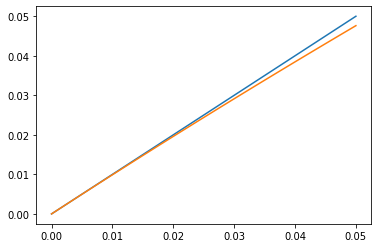

In [24]:
x = np.linspace(0,0.05,100)
y1 = x
y2 = x/(1+x)
plt.plot(x,y1)
plt.plot(x,y2)

In [26]:
dSlow.columns

Index(['SpecId', 'Label', 'ScanNr', 'ExpMass', 'CalcMass', 'mass', 'peplen',
       'charge2', 'charge3', 'charge4', 'charge5', 'enzN', 'enzC', 'enzInt',
       'dm', 'absdm', 'NuXL:mass_error_p', 'NuXL:err', 'NuXL:total_loss_score',
       'NuXL:modds', 'NuXL:immonium_score', 'NuXL:precursor_score', 'NuXL:MIC',
       'NuXL:Morph', 'NuXL:total_MIC', 'NuXL:ladder_score',
       'NuXL:sequence_score', 'NuXL:total_Morph', 'NuXL:total_HS',
       'NuXL:tag_XLed', 'NuXL:tag_unshifted', 'NuXL:tag_shifted',
       'nr_candidates', 'NuXL:rank_product', 'NuXL:wTop50',
       'NuXL:marker_ions_score', 'NuXL:partial_loss_score', 'NuXL:pl_MIC',
       'NuXL:pl_err', 'NuXL:pl_Morph', 'NuXL:pl_modds', 'NuXL:pl_pc_MIC',
       'NuXL:pl_im_MIC', 'NuXL:isXL', 'NuXL:score', 'variable_modifications',
       'precursor_intensity_log10', 'NuXL:NA_MASS_z0', 'NuXL:NA_length',
       'nucleotide_mass_tags', 'precursor_purity', 'NuXL:XL_U', 'NuXL:XL_C',
       'NuXL:XL_G', 'NuXL:XL_A', 'Peptide', 'Proteins', 

Training in iteration 1 with split 1/3 starts!
Length of positive trainingset: 3658, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.

Training in iteration 1 with split 2/3 starts!
Length of positive trainingset: 3819, length of negative training set: 28394
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Training in iteration 1 with split 3/3 starts!
Length of positive trainingset: 4140, length of negative training set: 28396
Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.

Using AUC of pseudo-ROC with x = [0,0.05] as metric.
Iteration 1/10 done! It yielded an auc of 277.86934107312106.

Training in iteration 2 with split 1/3 starts!
Length of positive trainingset: 4290, length of negative training set: 28394
Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.

Training in iteration 2 with split 2/3 starts!
Length of positive trainingset: 4516, length of negative training set: 28394
Optimal paramete

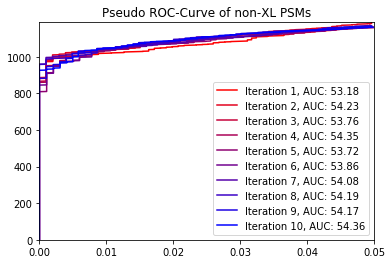

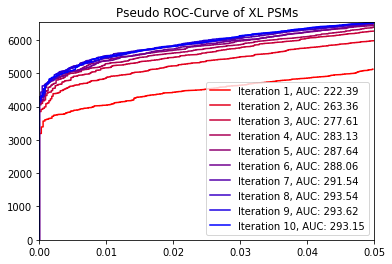

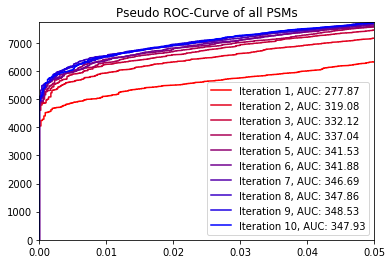

Wall time: 4min 42s


In [2]:
%%time

saveName = ''

p = percolator_experimental(dSlow, idCol, features, plotSaveName = saveName, multImputation = True)

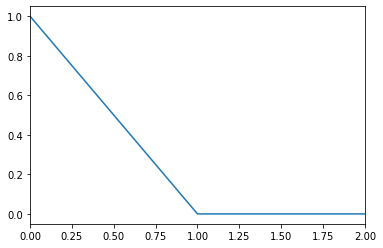

In [10]:
x = list(range(2501))
y = [pow(2.81,-(2500*i)) for i in x]
plt.xlim(0,2)
plt.plot(x,y)

In [9]:
# auc = area under the curve
auc(x,y)

0.5

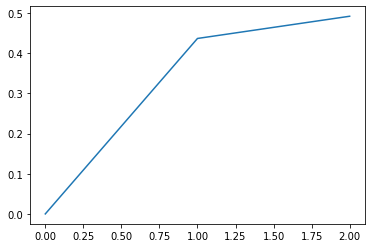

In [16]:
x = list(range(3))
y = [1/2*(1-pow(2.81,-2*i)) for i in x]
#plt.xlim(0,2)
plt.plot(x,y)